Noticed that images come in variable sizes, and we need 512x512

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
image = cv2.imread('../Example Images/C-8.png')

# First convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_length = len(image)
img_width = len(image[0])
# now we divide up the image into pieces 512x512 in size
images = []
for i in range(512, img_length, 512):
    for j in range(512, img_width, 512):
        images.append(image[i-512:i,j-512:j])

In [7]:
len(images)

81

In [10]:
# Saving the images
for i,img in enumerate(images):
    cv2.imwrite('../data/C-8_' + str(i) + '.png', img)

In [34]:
# Time to streamline the process of creating these broken images so its easier to put back together
def shatter_img(in_img, size=512):
    
    img_len = len(in_img)
    img_wid = len(in_img[0])
    # pad our image beforehand to make it easier for overlaying
    bottom_pad = size - img_len % size
    right_pad = size - img_wid % size
    img = cv2.copyMakeBorder(in_img, 0, bottom_pad, 0, right_pad, cv2.BORDER_CONSTANT, value=[0,0,0])
    
    img_len = len(img)
    img_wid = len(img[0])
    image_grid = []
    for i in range(size, img_len + 1, size):
        temp = []
        for j in range(size, img_wid + 1, size):
            temp.append(img[i-size:i,j-size:j])
        image_grid.append(temp)
    return image_grid

In [35]:
image = cv2.imread('../Example Images/C-8.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

images = shatter_img(image)

print(len(images))
print(len(images[0]))

10
10


In [36]:
for j,row in enumerate(images):
    for i,img in enumerate(row):
        cv2.imwrite('../data/C-8_' + str(j) + '-' + str(i) + '.png', img)

In [37]:
# now for recombining an image
def group_images(directory='./'):
    files = os.listdir(directory)
    image_name = files[0].split('_')[0]
    images = []
    temp = None
    for img in files:
        # strip the name for only parts we need
        row = int(img.split('_')[1].split('.')[0].split('-')[0])
        col = int(img.split('_')[1].split('.')[0].split('-')[1])
        # grid reconstruction
        if col == 0 and not temp:
            temp = []
        elif col == 0:
            images.append(temp)
            temp = []
        temp.append(cv2.imread(directory + img))
    
    # we are missing one append
    images.append(temp)
    
    return images
        

In [38]:
result = group_images('../data/ground_truth/')

In [39]:
def stitch_group(img_grid):
    height = len(img_grid) * len(img_grid[0][0])
    width = len(img_grid) * len(img_grid[0][0][0])
    ret_img = np.empty((height, width))
    image_rows = []
    for row in range(len(img_grid)):
        image_rows.append(np.concatenate(img_grid[row], axis=1))
    
    out_img = np.concatenate(image_rows, axis=0)
    
    return out_img
        

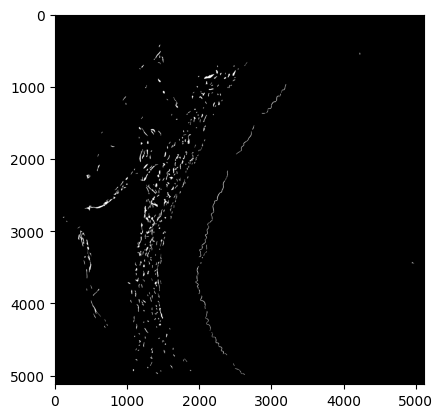

In [40]:
plt.imshow(stitch_group(result))

In [42]:
cv2.imwrite('../results/C-8_results.png', stitch_group(result))

True

# Manual editing of images
### ImageJ
### fijiJ